konlpy, mecab 설치하기

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 1.93 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
pwd

'/content/Mecab-ko-for-Google-Colab'

In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 43.7 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-04-08 09:44:25--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response-content-encoding=None&AWSAccessKeyId=

In [ ]:
from konlpy.tag import Mecab

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [ ]:
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


# 단어집합 생성하기

In [ ]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
len(data)

200000

In [ ]:
sample_data = data[:100] # 임의로 100개만 저장

정규표현식 사용하기

In [ ]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

<ipython-input-20-2131f05301ae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-20-2131f05301ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
tokenizer = Mecab()
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [ ]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [ ]:
np.hstack(tokenized)

array(['어릴', '때', '보', ..., '따', '봉', '임'], dtype='<U13')

In [ ]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


In [ ]:
vocab

FreqDist({'다': 46, '영화': 31, '고': 27, '을': 25, '하': 21, '있': 17, '게': 17, '보': 15, '없': 13, '최고': 13, ...})

In [ ]:
vocab['재밌']

10

In [ ]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


각 단어에 정수 부여하기

In [ ]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [ ]:
word_to_index

In [ ]:
tokenized[3]

['연기',
 '진짜',
 '개',
 '쩔',
 '구나',
 '지루',
 '할거',
 '라고',
 '생각',
 '했',
 '는데',
 '몰입',
 '해서',
 '봤',
 '다',
 '그래',
 '이런',
 '게',
 '진짜',
 '영화',
 '지']

In [ ]:
encoded = []

for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [ ]:
encoded

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29],
 [188,
  5,
  81,
  189,
  190,
  191,
  43,
  192,
  113,
  5,
  193,
  194,
  24,
  114,
  195,
  196,
  13,
  51,
  82,
  115,
  30,
  43,
  197,
  116,
  117,
  31,
  198,
  5,
  199,
  200,
  17,
  113,
  7,
  68,
  52,
  17,
  44,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84],
 [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11],
 [45,
  33,
  119,
  210,
  211,
  212,
  213,
  69,
  46,
  34,
  13,
  214,
  120,
  15,
  2,
  215,
  70,
  8,
  33,
  3,
  35],
 [216, 217, 218, 219, 7, 220, 17, 3],
 [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3],
 [124, 37, 221, 42, 80, 37],
 [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25],
 [56],
 [225, 87, 88, 226, 227, 57, 89],
 [21,
  228,
  17,
  3,
  50,
  36,
  48,
  37,
  18,
  2,
  229,
  230,
  42,
  231,
  232,
  54,
  54,
  43,
  125,
  5,
  233,
  6,
  8,
  234,
  19,
  32,
  22,
  17,
  2],
 [16, 2],
 [235, 236, 237, 2, 238, 29],
 [3, 239, 126, 69, 127, 

In [ ]:
print(encoded[:10])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3], [124, 37, 221, 42, 80, 37], [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


패딩 넣기

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


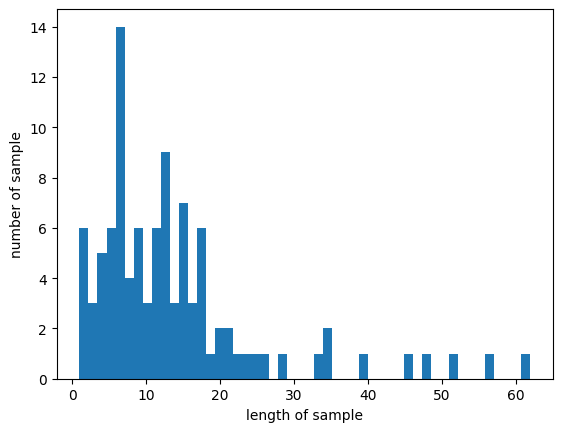

In [ ]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [ ]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [ ]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [ ]:
print(encoded[:3])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# torchtext 튜토리얼 영어

In [1]:
torchtext.__version__

NameError: ignored

In [3]:
!pip install torchtext==0.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.4/831.4 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.9.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.9.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but 

In [4]:
from torchtext.legacy.data import TabularDataset

In [5]:
import urllib.request
import pandas as pd

In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f02729665e0>)

In [7]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [8]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


In [9]:
train_df = df[:25000]
test_df = df[25000:]

In [10]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [12]:
from torchtext.legacy import data

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [13]:
train_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', test='test_data.csv', format='csv',
        fields=[('text', TEXT), ('label', LABEL)], skip_header=True)

In [14]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 25000
테스트 샘플의 개수 : 25000


In [15]:
print(vars(train_data[0]))

{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic', 'like', 'me

In [16]:
# 필드 구성 확인.
print(train_data.fields.items())

dict_items([('text', <torchtext.legacy.data.field.Field object at 0x7f02725efc70>), ('label', <torchtext.legacy.data.field.Field object at 0x7f02725ef700>)])


In [17]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [18]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))


단어 집합의 크기 : 10002


In [19]:
print(TEXT.vocab.stoi)


defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f0272966ac0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'not': 22, 'are': 23, 'you': 24, 'film': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'who': 35, 'all': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'about': 42, "it's": 43, 'if': 44, 'her': 45, 'some': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'more': 51, 'there': 52, 'even': 53, 'would': 54, 'my': 55, 'good': 56, 'she': 57, 'their': 58, 'only': 59, 'no': 60, 'really': 61, 'can': 62, 'up': 63, 'had': 64, 'which': 65, 'see': 66, 'were': 67, 'than': 68, '-': 69, 'we': 70, 'been': 71, 'into': 72, 'get': 73, 'much': 74, 'will': 75, 'because': 76, 'story': 77, 'most': 78, '

In [22]:
from torchtext.legacy.data import Iterator

In [23]:
batch_size = 5

train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [24]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 5000
테스트 데이터의 미니 배치 수 : 5000


In [25]:
batch = next(iter(train_loader)) # 첫번째 미니배치

In [26]:
print(type(batch))


<class 'torchtext.legacy.data.batch.Batch'>


field를 정의할 때, fix_length=20 했기때문에 20까지 cut, pad

In [27]:
print(batch.text)


tensor([[  10,    7,   30,    5,    2,  246,  125,    9,    0,    9,    0,   48,
           23,    2, 1375,   16,    0, 4274,    3, 2205],
        [  34,    2,  497,    5,    2,  131, 6816,   14,  952,   57,   14,   30,
            5,    2,  119,  819,  145,  117,   33,   73],
        [  10,   30,    7,    3,   87, 4616,  577,  852, 6499,    4, 5996,    0,
           26,    0,   63,    6,   90,    3, 1086,    4],
        [ 983, 1998, 4305,  187,  752, 1998,  383, 2775,  488,    0, 1998, 1371,
            0,  123,  199,   23,   22,  238, 1508,    8],
        [ 479,   55, 6458,    4,  234,  508,  260,   10, 8557,   44, 1485,   48,
         2759, 3207,  616,  190,    4,   70, 1091,   17]])


In [28]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.text[0]) # 첫번째 미니배치 중 첫번째 샘플 

tensor([  10,   20,   14, 5889,    9,  176,   53,  616,   11,    0,  223,   12,
        3717,   51,   34,    3,   20,   68, 1397,  599])


# torchtext 튜토리얼 한국어

In [29]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.3 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-04-11 10:01:00--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::

In [30]:
import urllib.request
import pandas as pd

In [31]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f0244a55d60>)

In [32]:
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')

In [33]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [34]:
print('훈련 데이터 샘플의 개수 : {}'.format(len(train_df)))
print('테스트 데이터 샘플의 개수 : {}'.format(len(test_df)))

훈련 데이터 샘플의 개수 : 150000
테스트 데이터 샘플의 개수 : 50000


In [35]:
from konlpy.tag import Mecab

In [36]:
# Mecab을 토크나이저로 사용
tokenizer = Mecab()

In [37]:
# 필드 정의
ID = data.Field(sequential = False,
                use_vocab = False) # 실제 사용은 하지 않을 예정

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [38]:
train_data, test_data = TabularDataset.splits(
        path='.', train='ratings_train.txt', test='ratings_test.txt', format='tsv',
        fields=[('id', ID), ('text', TEXT), ('label', LABEL)], skip_header=True)

In [39]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 150000
테스트 샘플의 개수 : 50000


In [40]:
print(vars(train_data[0]))

{'id': '9976970', 'text': ['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], 'label': '0'}


In [41]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [42]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))


단어 집합의 크기 : 10002


In [43]:
print(TEXT.vocab.stoi)


defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f024499a160>>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '는': 4, '영화': 5, '다': 6, '고': 7, '하': 8, '도': 9, '의': 10, '가': 11, '은': 12, '에': 13, '을': 14, '한': 15, '보': 16, '..': 17, '게': 18, ',': 19, '들': 20, '!': 21, '지': 22, '를': 23, '있': 24, '없': 25, '?': 26, '좋': 27, '나': 28, '었': 29, '만': 30, '는데': 31, '너무': 32, '봤': 33, '적': 34, '안': 35, '로': 36, '정말': 37, '음': 38, '으로': 39, '것': 40, '아': 41, '네요': 42, '재밌': 43, '어': 44, '점': 45, '같': 46, '지만': 47, '진짜': 48, '했': 49, '기': 50, '에서': 51, '네': 52, '않': 53, '거': 54, '았': 55, '수': 56, '되': 57, '면': 58, 'ㅋㅋ': 59, '과': 60, '말': 61, '인': 62, '연기': 63, '잘': 64, '최고': 65, '주': 66, '내': 67, '~': 68, '평점': 69, '이런': 70, '어요': 71, '던': 72, '와': 73, '할': 74, '왜': 75, '1': 76, '겠': 77, '해': 78, '스토리': 79, '습니다': 80, 'ㅋㅋㅋ': 81, '...': 82, '드라마': 83, '아니': 84, '생각': 85, '더': 86, '그': 87, '싶': 88, '사람': 89, '듯': 90, '감동': 91, '때': 92, '함': 93, '배우': 94, '본

In [45]:
from torchtext.legacy.data import Iterator


In [46]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [47]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 30000
테스트 데이터의 미니 배치 수 : 10000
